1) Explore la tendencia a lo largo del año para cada género: Número de libros más vendidos 
en cada género cada año: 
Precio medio, reseñas y valoración de los usuarios a lo largo del año por género
2) Analizar las variables por autor
Construir una tabla de autores
Define la función para contar el número de libros que tiene un autor en la lista de los más  vendidos:
¿Cuántos libros tienen los autores más vendidos?
Lista de autores con al menos 3 libros más vendidos:
3) Distribuciones de las variables
Explorar la distribución del Precio
4) Explorar las relaciones entre las variables en el conjunto de datos
Relación entre las Reseñas y la Valoración de los Usuarios, en comparación con el Género:
Explorar la relación entre el Precio y la Calificación de los Usuarios, comparada entre el 
Género:
5) Exploración de las relaciones entre las variables cuando se agrupan por autor
Explorar la relación entre el total de reseñas que tiene un autor y la valoración media de 
los usuarios para ese autor.
Explorar la relación entre el precio medio de los libros más vendidos de un autor y la 
valoración media de los usuarios de ese autor.
6) Conclusión

In [1]:
### LIBRERIAS A UTILIZAR ###
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import collections

In [6]:
libros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [2]:
### IMPORTAMOS LOS DATOS ###
libros = pd.read_csv('books.csv')
libros

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
###BORAR  DUPLICADOS
libros.drop_duplicates(subset="Name", keep=False, inplace=True)
libros

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
536,Whose Boat Is This Boat?: Comments That Don't ...,The Staff of The Late Show with,4.6,6669,12,2018,Non Fiction
537,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,17044,18,2012,Non Fiction
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction


# 1) Explore la tendencia a lo largo del año para cada género: Número de libros más vendidos en cada género cada año: Precio medio, reseñas y valoración de los usuarios a lo largo del año por género

<ipython-input-5-c49596423de8>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


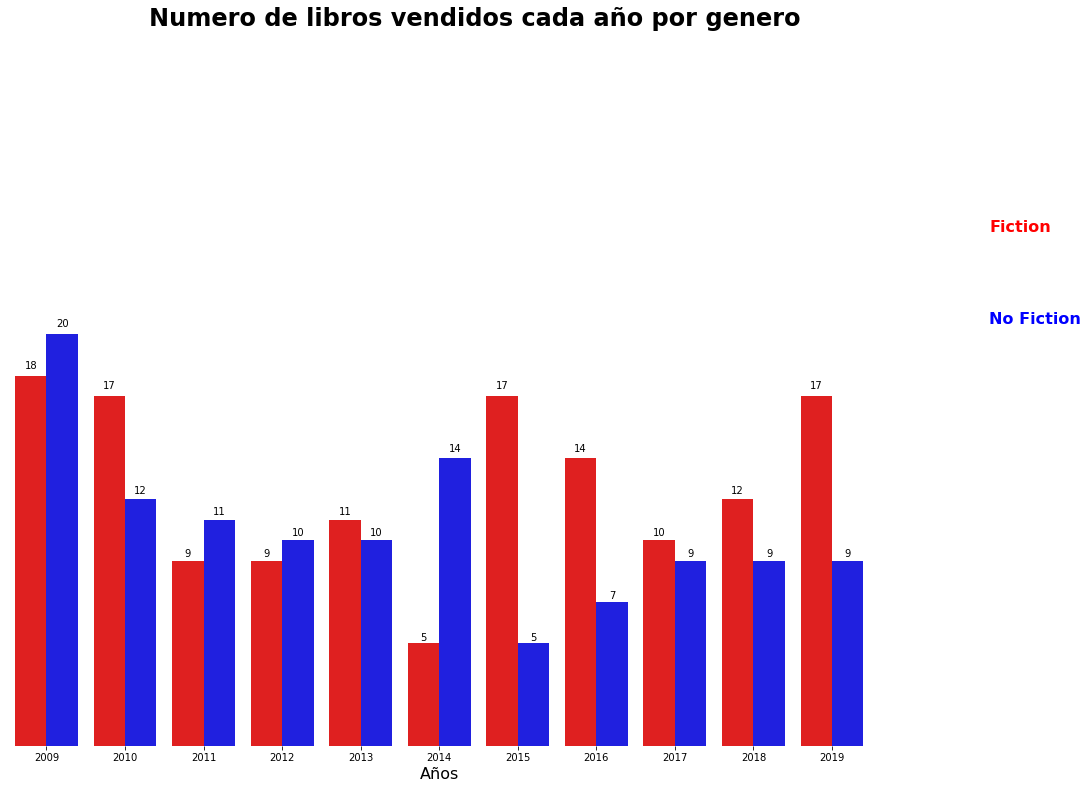

In [5]:
#LIBROS MAS VENDIDOS CADA AÑO POR GENERO
fig = plt.figure(figsize=(12,6))
axes = fig.add_axes([0,0,1,1])
sns.countplot(x=libros['Year'], hue=libros['Genre'], palette=['Red','Blue', ], ax=axes)
axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
axes.set_yticks([])
axes.get_legend().remove()

for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.0f}'.format(height), (x + width/2, y + height*1.02), ha='center')


axes.set_xlabel('Años', fontsize=16, color='black')
axes.set_ylabel('')
axes.text(1.3, 35, 'Numero de libros vendidos cada año por genero', color='Black', fontsize=24, fontweight='bold', label='Fiction books')
axes.text(12, 25, 'Fiction', fontsize=16, color='red', fontweight='bold')
axes.text(12, 20.5, 'No Fiction', fontsize=16, color='blue', fontweight='bold')

fig.show()

<ipython-input-6-dd653a77ed03>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(years)
<ipython-input-6-dd653a77ed03>:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


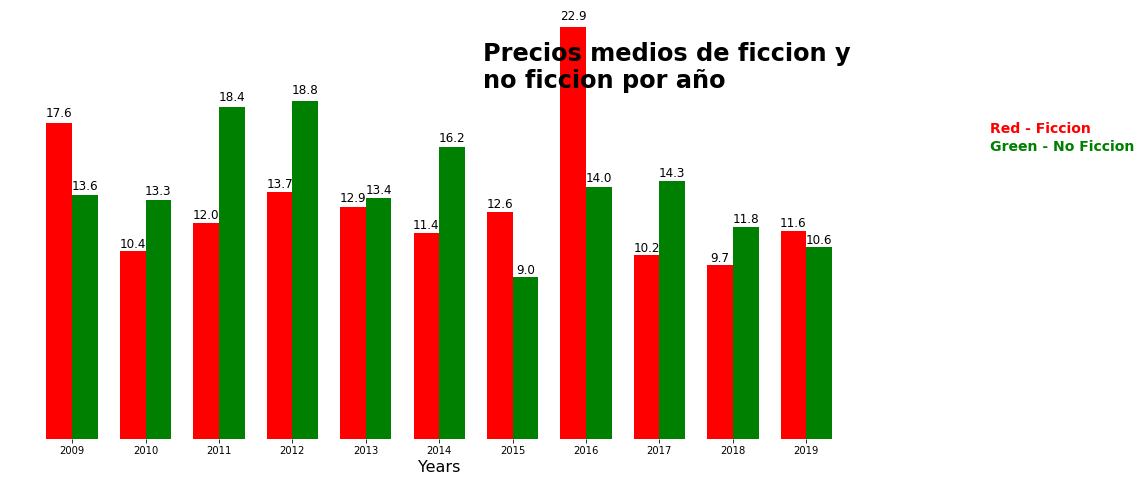

In [6]:
# PRECIO MEDIO CADA AÑO POR GENERO

mean_price_fiction_books = []
for year in range(2009,2020):
    mean = libros[libros['Genre']=='Fiction'][libros[libros['Genre']=='Fiction']['Year']==year]['Price'].mean()
    mean_price_fiction_books.append(mean)
mean_price_non_fiction_books = []
for year in range(2009,2020):
    mean = libros[libros['Genre']=='Non Fiction'][libros[libros['Genre']=='Non Fiction']['Year']==year]['Price'].mean()
    mean_price_non_fiction_books.append(mean)
    
#PRECIO MEDIO DE CADA GENERO
years = range(2009,2020, 1)
mean_price_fiction_books_df = pd.DataFrame({'Year':years, 'Mean_price':mean_price_fiction_books})
mean_price_non_fiction_books_df = pd.DataFrame({'Year':years, 'Mean_price':mean_price_non_fiction_books})

fig = plt.figure(figsize=(12,6))
axes = fig.add_axes([0,0,1,1])
x = np.arange(len(years))
width = 0.35

axes.bar(x - width/2, height=mean_price_fiction_books_df['Mean_price'], color='red', width=width)
axes.bar(x + width/2, height=mean_price_non_fiction_books_df['Mean_price'], color='green', width=width)
axes.set_xticklabels(years)
axes.set_xticks(x)
axes.set_yticks([])


axes.set_xlabel('Years', fontsize=16, color='black')
axes.set_ylabel('')
axes.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

for p in axes.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    axes.annotate('{:.1f}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize=12, color='black')
    

axes.text(5.6, 21, 'Precios medios de ficcion y', color='Black', fontsize=24, fontweight='bold', label='Fiction books')
axes.text(5.6, 19.5, 'no ficcion por año', color='Black', fontsize=24, fontweight='bold', label='Non fiction books')

# conclusion

axes.text(12.5, 17, 'Red - Ficcion', fontsize=14, color='red', fontweight='bold')
axes.text(12.5, 16, 'Green - No Ficcion', fontsize=14, color='green', fontweight='bold')

fig.show()

# 2) Analizar las variables por autor
#Construir una tabla de autores
#Define la función para contar el número de libros que tiene un autor en la lista de los más
#vendidos:
#¿Cuántos libros tienen los autores más vendidos?
#Lista de autores con al menos 3 libros más vendidos:

In [8]:
numero_libros_autor= collections.Counter(libros['Author'].tolist())
numero_libros_autor = numero_libros_autor.most_common(10)
numero_libros_autor

[('Jeff Kinney', 12),
 ('Rick Riordan', 9),
 ('Stephenie Meyer', 7),
 ('J.K. Rowling', 6),
 ('Dav Pilkey', 5),
 ("Bill O'Reilly", 5),
 ('John Grisham', 5),
 ('Stephen King', 4),
 ('Charlaine Harris', 4),
 ('E L James', 4)]

Text(0.5, 1.0, 'Top 10 Autores')

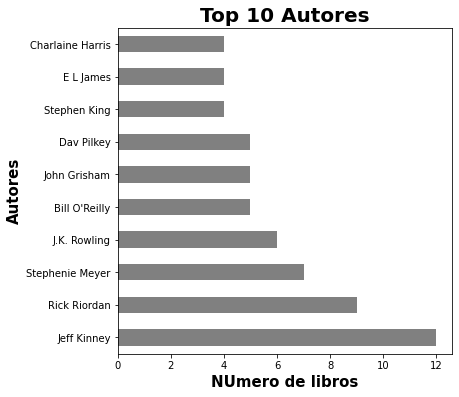

In [9]:
# TOP DE AUTORES CON MAYOR NUMERO DE LIBROS
top_authors=libros['Author'].value_counts().sort_values(ascending=False).head(10)
top_authors.plot(kind='barh',color='gray',figsize=(6,6))

plt.xlabel("Numero de libros",fontsize=15,fontweight='bold')
plt.ylabel("Autores",fontsize=15,fontweight='bold')
plt.title("Top 10 Autores",fontsize=20,fontweight='bold')

# 3) Distribuciones de las variables
#Explorar la distribución del Precio

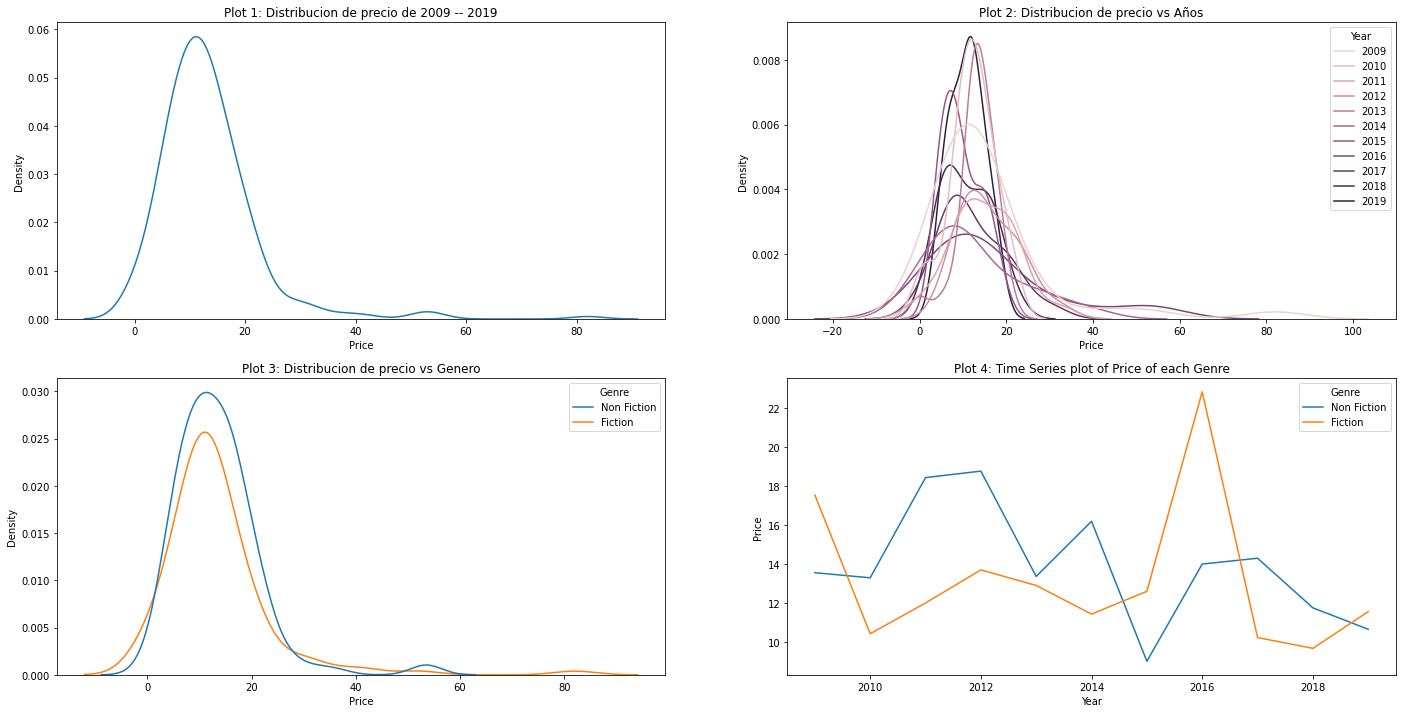

In [14]:
fig, ax = plt.subplots(2,2, figsize = (24,12))

sns.kdeplot(data = libros, x = 'Price', ax = ax[0][0])
ax[0][0].set_title('Plot 1: Distribucion de precio de 2009 -- 2019')


sns.kdeplot(data = libros, x = 'Price', hue = 'Year', ax = ax[0][1])
ax[0][1].set_title('Plot 2: Distribucion de precio vs Años')


sns.kdeplot(data = libros, x = 'Price', hue = 'Genre', ax = ax[1][0])
ax[1][0].set_title('Plot 3: Distribucion de precio vs Genero')


sns.lineplot(data = libros, x = 'Year', y = 'Price', hue = 'Genre', ci = None, ax = ax[1][1])
ax[1][1].set_title('Plot 4: Time Series plot of Price of each Genre')

plt.show()

# 4) Explorar las relaciones entre las variables en el conjunto de datos
 #Relación entre las Reseñas y la Valoración de los Usuarios, en comparación con el Género:
 #Explorar la relación entre el Precio y la Calificación de los Usuarios, comparada entre el
 #Género:

<AxesSubplot:>

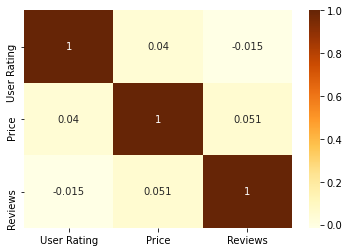

In [19]:
# Correlacion
sns.heatmap(data = libros.loc[:, ['User Rating','Price','Reviews']].corr(),
            cmap = 'YlOrBr', annot = True)

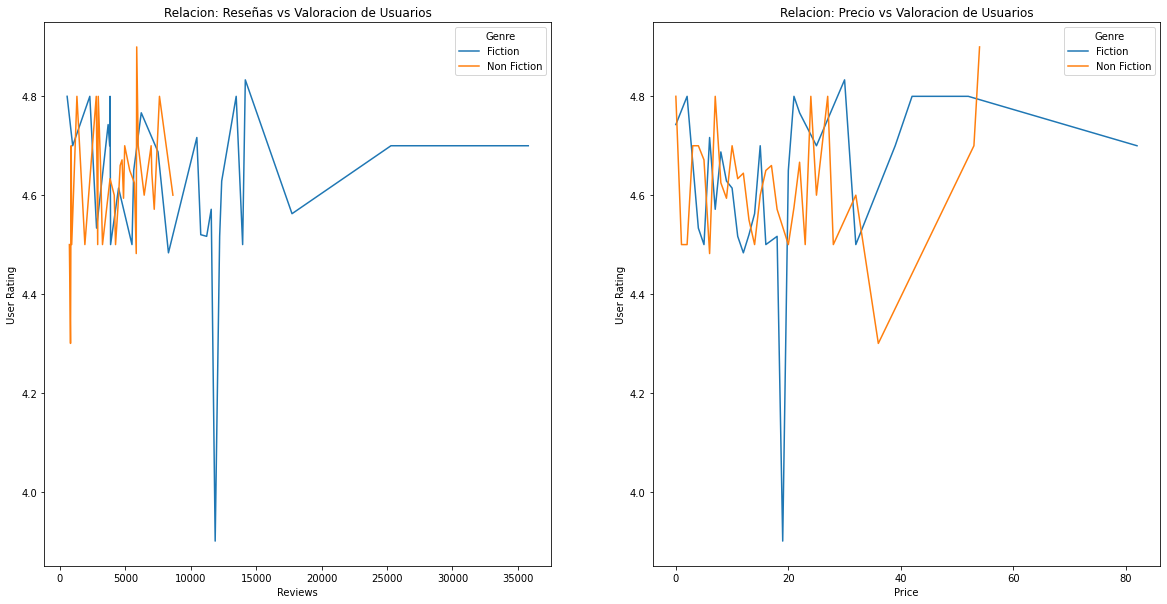

In [32]:
table_year = libros.groupby(by = ['Price','Genre']).aggregate({'Reviews':'mean','User Rating':'mean'})


fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.lineplot(data = table_year, x = 'Reviews', y = 'User Rating', hue = 'Genre', ax = ax[0])
ax[0].set_title('Relacion: Reseñas vs Valoracion de Usuarios')
sns.lineplot(data = table_year, x = 'Price', y = 'User Rating', hue = 'Genre', ax = ax[1])
ax[1].set_title('Relacion: Precio vs Valoracion de Usuarios')
plt.show()


# 5) Exploración de las relaciones entre las variables cuando se agrupan por autor
Explorar la relación entre el total de reseñas que tiene un autor y la valoración media de
los usuarios para ese autor.
Explorar la relación entre el precio medio de los libros más vendidos de un autor y la
valoración media de los usuarios de ese autor.

<ipython-input-40-47c830855d99>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(main_df2['User Rating'].index,fontweight='bold',fontsize=12)


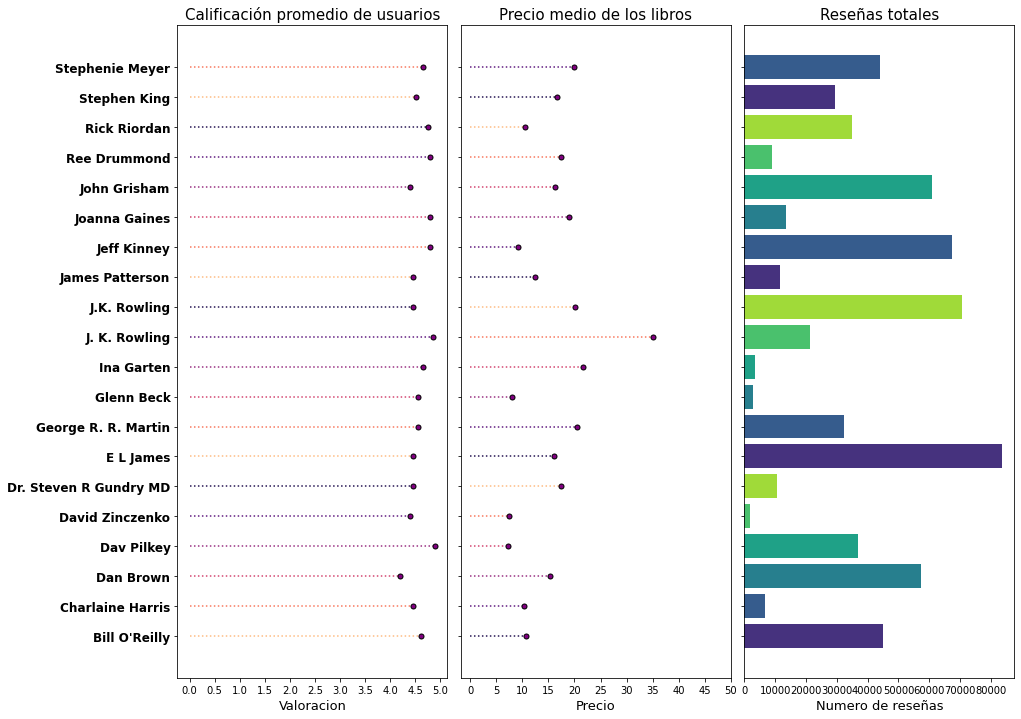

In [40]:
color=sns.color_palette('viridis')
c1=sns.color_palette('magma')
c2=sns.color_palette('magma_r')

new_df = libros.drop_duplicates('Name')

df1 = libros.groupby('Author').count().sort_values('Name',ascending=False)[:20]
index = df1.index
main_df = pd.DataFrame(new_df[libros['Author']==index[0]])

for i in index[1:]:
    sub_df = new_df[new_df['Author']==i]
    main_df = pd.concat([main_df,sub_df])
    

main_df1 = main_df.groupby('Author').sum()
main_df2 = main_df.groupby('Author').mean()

fig, ax = plt.subplots(1,3,figsize=(15,12),sharey=True)
plt.subplots_adjust(wspace=0.05)

ax[0].hlines(xmin=0,xmax=main_df2['User Rating'].values,y=main_df2['User Rating'].index,linestyle='dotted',color=c2)
ax[0].plot(main_df2['User Rating'].values,main_df2.index,'o',markersize=5,markerfacecolor='purple',markeredgecolor='black')
ax[0].set_xticks(np.linspace(0,5,11))
ax[0].set_xlabel('Valoracion',fontsize=13)
ax[0].set_title('Calificación promedio de usuarios',fontsize=15)
ax[0].set_yticklabels(main_df2['User Rating'].index,fontweight='bold',fontsize=12)

ax[1].hlines(xmin=0,xmax=main_df2['Price'].values,y=main_df2['Price'].index,linestyle='dotted',color=c1)
ax[1].plot(main_df2['Price'].values,main_df2.index,'o',markersize=5,markerfacecolor='purple',markeredgecolor='black')
ax[1].set_xticks(list(range(0,51,5)))
ax[1].set_xlabel('Precio',fontsize=13)
ax[1].set_title('Precio medio de los libros',fontsize=15)

ax[2].barh(y=main_df1['Reviews'].index,width=main_df1['Reviews'].values,color=color)
ax[2].set_xlabel('Numero de reseñas',fontsize=13)
ax[2].set_title('Reseñas totales',fontsize=15)

plt.show()
